# Data Analysis
Just to take a quick look at the distribution around the actual distance.

In [78]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Visualizing 3D and signal strength along 3 axes.
## Import data

In [80]:
# Locations
# 0 - Laser Cutter
# 1 - 3D Printers
# 2 - Back Left Table
# 3 - Back Right Table
# 4 - Front Table
# 5 - Tool Boxes
# 6 - Front Desk

col_names=["r_dist", "r_rssi", "g_dist", "g_rssi", "b_dist", "b_rssi"]
laser_cutter_df = pd.read_csv("laser_cutter.csv", names=col_names)
laser_cutter_df["location"] = "0"

printers_df = pd.read_csv("printers.csv", names=col_names)
printers_df["location"] = "1"

bl_table_df = pd.read_csv("bl_table.csv", names=col_names)
bl_table_df["location"] = "2"

br_table_df = pd.read_csv("br_table.csv", names=col_names)
br_table_df["location"] = "3"

toolboxes_df = pd.read_csv("toolboxes.csv", names=col_names)
toolboxes_df["location"] = "4"

df = pd.concat([laser_cutter_df, printers_df, bl_table_df, br_table_df, toolboxes_df])

In [81]:
# 0
color_discrete_map = {"0": 'rgb(128, 0, 128)', "1": 'rgb(0, 0, 255)', "2": 'rgb(255, 0, 0)',
                       "3": 'rgb(0, 128, 128)', "4": 'rgb(128, 128, 0)', "5": 'rgb(200, 200, 200)', "6":'rgb(0, 255, 0)'}

In [82]:
fig = px.scatter_3d(df, x='r_dist', y='g_dist', z='b_dist',
              color='location', color_discrete_map=color_discrete_map)
fig.show()

In [83]:
fig = px.scatter_3d(df, x='r_rssi', y='g_rssi', z='b_rssi',
              color='location', color_discrete_map=color_discrete_map)
fig.show()

In [84]:
X = df.drop('location', axis=1)
y = df['location']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [86]:
model.feature_importances_

array([0.38065886, 0.        , 0.26972521, 0.        , 0.34961594,
       0.        ])

Notes here about feature importance

[Text(0.4230769230769231, 0.875, 'x[4] <= 723.887\ngini = 0.748\nsamples = 99\nvalue = [22.0, 28.0, 26.0, 23.0]'),
 Text(0.15384615384615385, 0.625, 'x[0] <= 1795.641\ngini = 0.36\nsamples = 19\nvalue = [15, 1, 2, 1]'),
 Text(0.28846153846153844, 0.75, 'True  '),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.23076923076923078, 0.375, 'x[0] <= 2128.603\ngini = 0.29\nsamples = 18\nvalue = [15, 1, 2, 0]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.571\nsamples = 7\nvalue = [4, 1, 2, 0]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0, 0, 0]'),
 Text(0.6923076923076923, 0.625, 'x[0] <= 2045.646\ngini = 0.713\nsamples = 80\nvalue = [7, 27, 24, 22]'),
 Text(0.5576923076923077, 0.75, '  False'),
 Text(0.5384615384615384, 0.375, 'x[2] <= 819.129\ngini = 0.549\nsamples = 32\nvalue = [0, 2, 17, 13]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6]'),
 Text(0.6153846153846154, 0.125, 'gi

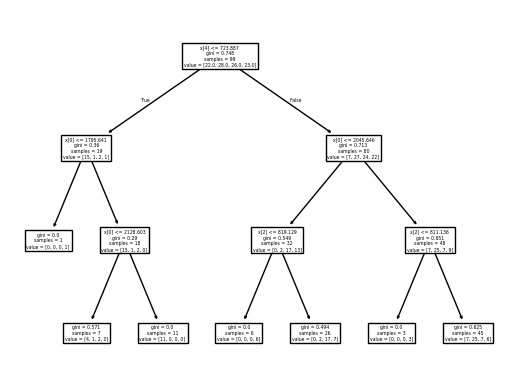

In [87]:
plot_tree(model)

In [88]:
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.48
Confusion Matrix:
[[4 1 0 1]
 [0 4 0 0]
 [1 5 0 0]
 [0 2 3 4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.33      1.00      0.50         4
           2       0.00      0.00      0.00         6
           3       0.80      0.44      0.57         9

    accuracy                           0.48        25
   macro avg       0.48      0.53      0.45        25
weighted avg       0.53      0.48      0.46        25



It looks like the decision tree is not exceptional at classifying the points, I can still give it a try, but I might go for a more straightforward method, characterizing each of the clusters by its meaning and std along each axis (removing outliers), and grading the likelihood by how many stds away it is.